In [58]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from colicoords import load, CellPlot
from colicoords.support import running_sum
from colicoords.postprocess import align_storm
import matplotlib.gridspec as gridspec
from pycorrelate import ucorrelate
import os
import seaborn as sns

In [82]:
def calc_dx_dy(cell, x):
    d_xr = cell.coords.p_dx(x)
    dy = 1 / np.sqrt(d_xr ** 2 + 1)
    dx = d_xr / np.sqrt(d_xr ** 2 + 1)
    return dx, dy

In [59]:
c = load('../../data/lacy_selected_cell_3.hdf5')

In [60]:
r_bk = c.radius

In [61]:
#20181204 epec cell 4
c_storm = load('storm_result_cell.hdf5')

In [62]:
c.coords.r = c_storm.radius
storm_aligned = align_storm(c, [c_storm], 'storm')
c.coords.r = r_bk

In [63]:
c.data.add_data(storm_aligned, 'storm')

In [64]:
reconstructed_bf = c.reconstruct_image('brightfield', step=0.5)
c.data.add_data(reconstructed_bf, 'brightfield', 'sim_bf')

<IPython.core.display.Javascript object>


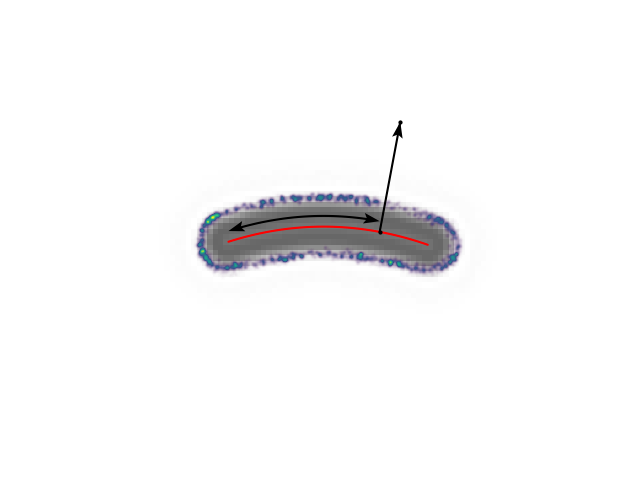

In [84]:
c.coords.r = r_bk
c.coords.r *=0.95
cmap = plt.cm.gray
bf = c.data.data_dict['sim_bf']
colors = cmap((bf - bf.min()) / (bf.max() - bf.min()))
colors[..., -1] = np.ones_like(bf)*0.45


alpha = 0.60*(1-(np.exp(c.coords.rc - c.coords.r) / (np.exp(c.coords.rc - c.coords.r) + 1)))
colors[..., -1] = alpha

fig, ax = plt.subplots()
cp = CellPlot(c)

cp.imshow(colors)
#cp.plot_outline()
cp.plot_storm(method='gauss', upscale=10, alpha_cutoff=0.25, cmap='viridis')
cp.plot_midline()

#POINT A
xp, yp = 48, 12
xc = c.coords.calc_xc(xp, yp)
xc_A = xc
xp_A, yp_A = xp, yp

yc = c.coords.p(xc)
ax.plot([xp, xc], [yp, yc], color='k', marker='o', markersize=2)
#ax0.vlines(xc, c.coords.p(xc), c.data.shape[0], **vline_kwargs)

dx = xp - xc
dy = yp - yc
ax.arrow(xp - dx, yp - dy, dx, dy, color='k',
          head_width=2, head_length=3, length_includes_head=True, lw=0, overhang=0.2)


l_x = np.linspace(c.coords.xl, xc, 100, endpoint=True)
l_y = c.coords.p(l_x) - 2

ax.plot(l_x[5:-5], l_y[5: -5], color='k')

#arrow
dy, dx = calc_dx_dy(c, l_x[0])
dx *= -5
dy *= -5
ax.arrow(l_x[0] - dx, l_y[0] - dy, dx, dy, color='k',
          head_width=2, head_length=3, length_includes_head=True, lw=0, overhang=0.2)

dy, dx = calc_dx_dy(c, l_x[-1])
dx *= 5
dy *= 5
ax.arrow(l_x[-1] - dx, l_y[-1] - dy, dx, dy, color='k',
          head_width=2, head_length=3, length_includes_head=True, lw=0, overhang=0.2)


plt.axis('off')

plt.savefig('striking_img.pdf', dpi=600)